<b><p style="font-size:60px; text-align:center;">SMS SPAM </p></b>



<b><p style="font-size:30px;">DESCRIPTION  </p></b>

This corpus has been collected from free or free for research sources at the Internet:

-> A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. The Grumbletext Web site is: [Web Link].
-> A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. The NUS SMS Corpus is avalaible at: [Web Link].
-> A list of 450 SMS ham messages collected from Caroline Tag's PhD Thesis available at [Web Link].
-> Finally, we have incorporated the SMS Spam Corpus v.0.1 Big. It has 1,002 SMS ham messages and 322 spam messages and it is public available at: [Web Link]. This corpus has been used in the following academic researches:

[1] GÃ³mez Hidalgo, J.M., Cajigas Bringas, G., Puertas Sanz, E., Carrero GarcÃ­a, F. Content Based SMS Spam Filtering. Proceedings of the 2006 ACM Symposium on Document Engineering (ACM DOCENG'06), Amsterdam, The Netherlands, 10-13, 2006.

[2] Cormack, G. V., GÃ³mez Hidalgo, J. M., and Puertas SÃ¡nz, E. Feature engineering for mobile (SMS) spam filtering. Proceedings of the 30th Annual international ACM Conference on Research and Development in information Retrieval (ACM SIGIR'07), New York, NY, 871-872, 2007.

[3] Cormack, G. V., GÃ³mez Hidalgo, J. M., and Puertas SÃ¡nz, E. Spam filtering for short messages. Proceedings of the 16th ACM Conference on Information and Knowledge Management (ACM CIKM'07). Lisbon, Portugal, 313-320, 2007.


Attribute Information:

The collection is composed by just one text file, where each line has the correct class followed by the raw message. We offer some examples bellow:

ham What you doing?how are you?
ham Ok lar... Joking wif u oni...
ham dun say so early hor... U c already then say...
ham MY NO. IN LUTON 0125698789 RING ME IF UR AROUND! H*
ham Siva is in hostel aha:-.
ham Cos i was out shopping wif darren jus now n i called him 2 ask wat present he wan lor. Then he started guessing who i was wif n he finally guessed darren lor.
spam FreeMsg: Txt: CALL to No: 86888 & claim your reward of 3 hours talk time to use from your phone now! ubscribe6GBP/ mnth inc 3hrs 16 stop?txtStop
spam Sunshine Quiz! Win a super Sony DVD recorder if you canname the capital of Australia? Text MQUIZ to 82277. B
spam URGENT! Your Mobile No 07808726822 was awarded a L2,000 Bonus Caller Prize on 02/09/03! This is our 2nd attempt to contact YOU! Call 0871-872-9758 BOX95QU

Note: the messages are not chronologically sorted.

We will follow the steps mentioned below:

 - Data Loading
 - VExploratory Data Analysis
 - Data Preprocessing
 - Convert sentence into lower case
 - Remove Stop Words
 - Stemming or Lemmatization
 - Data Preparation
 - Train Test Split
 - Text to numerical vector using Bag of Words
 - Training and Evaluation

<b><p style="font-size:20px;">LOADING THE DATA  </p></b>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("SMSSpamCollection",sep="\t",names=['target','message'])
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.describe()

,target,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   target   5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.shape

(5572, 2)

<b><p style="font-size:25px;">OBSERVATION </p></b>

 - ENLISTING THE FOLLOWING INFORMATION: 
 - THE HEAD WHICH DISPLAYES THE TOP 5 ROWS OF THE DATA 
 - DESCRIBING THE DATA SET 
 - ACC TO INFORMATION THERE ARE NO MISSING VALUES IN THE DATASET 
 - THERE ARE 5572 ROWS AND 2 COLUMNS IN THE DATSET   <b>
    

<b><p style="font-size:60px;">EXPLORATORY DATA ANALYSIS  </p></b>

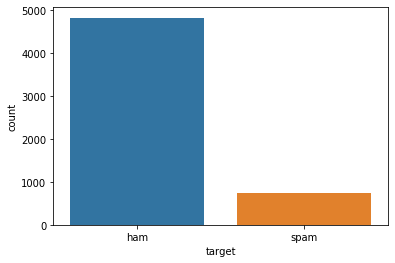

In [6]:
sns.countplot(x='target', data=df)

<b><p style="font-size:20px;">OBSERVATION  </p></b>
 - THERE ARE 4825 MESAAGES ARE HAM AND 747 MESSAGES ARE SPAM<B>

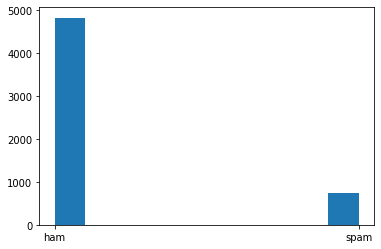

In [7]:
plt.hist(df['target'])
plt.show()

In [8]:
df['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

In [9]:
df['message'].value_counts()

Sorry, I'll call later                                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                                    12
Ok...                                                                                                                                                                                  10
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...                     4
Wen ur lovable bcums angry wid u, dnt take it seriously.. Coz being angry is d most childish n true way of showing deep affection, care n luv!.. kettoda manda... Have nice day da.     4
                                                                      

In [10]:
from wordcloud import WordCloud, STOPWORDS

In [11]:
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
sms_df = df.loc[df['target']=='spam', :]

words = ' '.join(df['message'])

cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [13]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

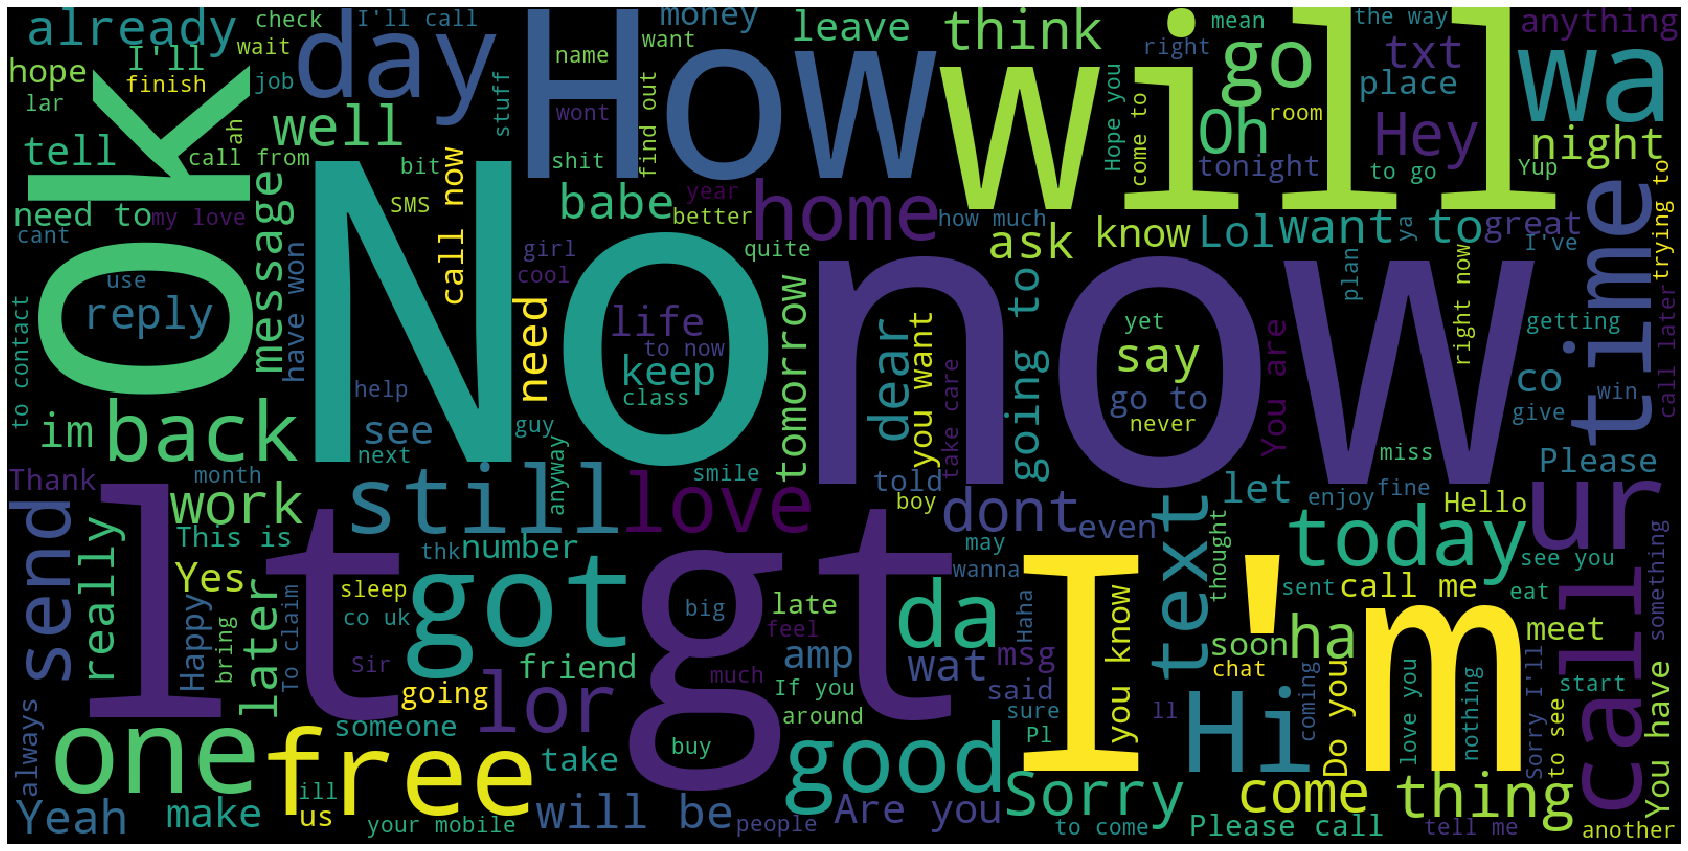

In [14]:
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<b><p style="font-size:20px;">OBSERVATION  </p></b>

WE FOUND THAT MESSAGES THAT ARE SPAM ARE USUALLY NO,NOW,It ETC

In [15]:
words = ' '.join(df['message'])

print(words[:2000])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's U dun say so early hor... U c already then say... Nah I don't think he goes to usf, he lives around here though FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv Even my brother is not like to speak with me. They treat me like aids patent. As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U R entitl

<b><p style="font-size:30px;">DATA PREPROCESSING  </p></b>

Our data exploration ends up at here. The next step will be preprocess the data in order to make the learning process more smooth.

Preprocessing steps:

 - Removing special characters
 - Convert sentence into lower case
 - Remove Stop Words
 - Stemming or Lemmatization

In [16]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [17]:
stemmer = PorterStemmer()

In [18]:
lemmatizer = WordNetLemmatizer()

In [19]:
clean_message_lst = []

message_len_lst = []

In [20]:
def preprocess(raw_df, flag):
    # Removing special characters and digits
    letters_only = re.sub("[^a-zA-Z]", " ",raw_df)
    
    # change sentence to lower case
    letters_only = letters_only.lower()

    # tokenize into words
    words = letters_only.split()
    
    # remove stop words                
    words = [w for w in words if not w in stopwords.words("english")]
    
    #Stemming/Lemmatization
    if(flag == 'stem'):
        words = [stemmer.stem(word) for word in words]
    else:
        words = [lemmatizer.lemmatize(word) for word in words]
    
    clean_message_lst.append(" ".join(words))
    
    message_len_lst.append(len(words))

In [21]:
from tqdm import tqdm, tqdm_notebook

tqdm.pandas()

In [22]:
clean_message_lst = []

message_len_lst = []

df['message'].progress_apply(lambda x: preprocess(x, 'stem'))

df['clean_message_stem'] = clean_message_lst

df['message_length_stem'] = message_len_lst

100%|█████████████████████████████████████████████████████████████████████████████| 5572/5572 [00:32<00:00, 172.23it/s]


In [23]:
clean_message_lst = []

message_len_lst = []

df['message'].progress_apply(lambda x: preprocess(x, 'lemma'))

df['clean_message_lema'] = clean_message_lst

df['message_length_lema'] = message_len_lst

100%|█████████████████████████████████████████████████████████████████████████████| 5572/5572 [00:28<00:00, 195.85it/s]


In [24]:
df.head()

,target,message,clean_message_stem,message_length_stem,clean_message_lema,message_length_lema
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,16,go jurong point crazy available bugis n great ...,16
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,6,ok lar joking wif u oni,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...,21,free entry wkly comp win fa cup final tkts st ...,21
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,9,u dun say early hor u c already say,9
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though,7,nah think go usf life around though,7


<b><p style="font-size:30px;">DATA PREPARTION </p></b>

Let's now prepare the data and build the model.

In [25]:
df['tg']=df['target'].apply(lambda x: 0 if x=='spam' else 1)

df.head()

,target,message,clean_message_stem,message_length_stem,clean_message_lema,message_length_lema,tg
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,16,go jurong point crazy available bugis n great ...,16,1
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,6,ok lar joking wif u oni,6,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...,21,free entry wkly comp win fa cup final tkts st ...,21,0
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,9,u dun say early hor u c already say,9,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though,7,nah think go usf life around though,7,1


In [26]:

from sklearn.model_selection  import train_test_split

train, test = train_test_split(df,test_size=0.2,random_state=42)

In [27]:
train_clean_message=[]
for message in train['clean_message_stem']:
    train_clean_message.append(message)

test_clean_message=[]
for message in test['clean_message_stem']:
    test_clean_message.append(message)

<b><p style="font-size:30px;">TEXT TO NUMERICAL USING BAG OF WORDS  </p></b>

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = "word")

train_features = vectorizer.fit_transform(train_clean_message)

test_features = vectorizer.transform(test_clean_message)

In [29]:
vectorizer.vocabulary_

{'repli': 3969,
 'win': 5387,
 'weekli': 5323,
 'fifa': 1661,
 'world': 5452,
 'cup': 1082,
 'held': 2114,
 'send': 4196,
 'stop': 4586,
 'end': 1461,
 'servic': 4213,
 'hello': 2118,
 'sort': 4461,
 'town': 4980,
 'alreadi': 147,
 'dont': 1314,
 'rush': 4069,
 'home': 2171,
 'eat': 1403,
 'nacho': 3145,
 'let': 2680,
 'know': 2577,
 'eta': 1512,
 'come': 931,
 'guoyang': 2032,
 'go': 1930,
 'tell': 4784,
 'told': 4934,
 'hey': 2130,
 'sathya': 4122,
 'till': 4897,
 'dint': 1255,
 'meet': 2934,
 'even': 1523,
 'singl': 4330,
 'time': 4898,
 'saw': 4131,
 'situat': 4342,
 'orang': 3389,
 'bring': 619,
 'rington': 4019,
 'chart': 793,
 'hero': 2127,
 'free': 1779,
 'hit': 2144,
 'week': 5321,
 'pic': 3571,
 'wap': 5279,
 'receiv': 3911,
 'tip': 4900,
 'sit': 4337,
 'mu': 3107,
 'wait': 5261,
 'everyon': 1531,
 'get': 1890,
 'suit': 4652,
 'take': 4736,
 'shower': 4290,
 'finish': 1680,
 'liao': 2684,
 'urgent': 5146,
 'mobil': 3034,
 'award': 353,
 'bonu': 563,
 'caller': 702,
 'prize': 

In [30]:
print("Total unique words:", len(vectorizer.vocabulary_))

print("Type of train_features:", type(train_features))

print("Shape of input data", train_features.shape)

Total unique words: 5593
Type of train_features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data (4457, 5593)


<b><p style="font-size:30px;">MODEL BUILDING AND EVALUATION </p></b>

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [45]:
Classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC()]

In [46]:
dense_features = train_features.toarray()

dense_test = test_features.toarray()

for classifier in tqdm(Classifiers):
    fit = classifier.fit(dense_features,train['tg'])
    pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['tg'])
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))
    con_matrix=confusion_matrix(pred,test['tg'])
    print('Confusion matrix of '+classifier.__class__.__name__+' is '+str(con_matrix))
    class_report=classification_report(pred,test['tg'])
    print('classfication report'+classifier.__class__.__name__+' is '+str(class_report))

 33%|███████████████████▋                                       | 1/3 [00:00<00:01,  1.04it/s]

Accuracy of LogisticRegression is 0.9838565022421525
Confusion matrix of LogisticRegression is [[132   1]
 [ 17 965]]
classfication reportLogisticRegression is               precision    recall  f1-score   support

           0       0.89      0.99      0.94       133
           1       1.00      0.98      0.99       982

    accuracy                           0.98      1115
   macro avg       0.94      0.99      0.96      1115
weighted avg       0.99      0.98      0.98      1115



 67%|███████████████████████████████████████▎                   | 2/3 [00:14<00:04,  4.74s/it]

Accuracy of DecisionTreeClassifier is 0.9766816143497757
Confusion matrix of DecisionTreeClassifier is [[132   9]
 [ 17 957]]
classfication reportDecisionTreeClassifier is               precision    recall  f1-score   support

           0       0.89      0.94      0.91       141
           1       0.99      0.98      0.99       974

    accuracy                           0.98      1115
   macro avg       0.94      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115



100%|███████████████████████████████████████████████████████████| 3/3 [00:57<00:00, 19.12s/it]

Accuracy of SVC is 0.9838565022421525
Confusion matrix of SVC is [[131   0]
 [ 18 966]]
classfication reportSVC is               precision    recall  f1-score   support

           0       0.88      1.00      0.94       131
           1       1.00      0.98      0.99       984

    accuracy                           0.98      1115
   macro avg       0.94      0.99      0.96      1115
weighted avg       0.99      0.98      0.98      1115



<b><p style="font-size:30px;">SAVING THE MODEL AND ENCODER IN PICKLE</p></b>

In [35]:
model = LogisticRegression()
model.fit(dense_features,train['tg'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
from pickle import dump

dump(vectorizer, open('countvectorizer.pkl', 'wb'))

dump(model, open('logit_model.pkl', 'wb'))

<b><p style="font-size:30px;">PREDICTION ON FUTURE DATA POINTS  </p></b>

In [37]:
from pickle import load

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [39]:
def preprocess(raw_message):
    # Removing special characters and digits
    letters_only = re.sub("[^a-zA-Z]", " ",raw_message)
    
    # change sentence to lower case
    letters_only = letters_only.lower()

    # tokenize into words
    words = letters_only.split()
    
    # remove stop words                
    words = [w for w in words if not w in stopwords.words("english")]
    
    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    
    clean_sent = " ".join(words)
    
    return clean_sent

In [40]:
def predict(message):
    
    # Loading pretrained CountVectorizer from pickle file
    vectorizer = load(open('countvectorizer.pkl', 'rb'))
    
    # Loading pretrained logistic classifier from pickle file
    classifier = load(open('logit_model.pkl', 'rb'))
    
    # Preprocessing the tweet
    clean_message = preprocess(message)
    
    # Converting text to numerical vector
    clean_message_encoded = vectorizer.transform([clean_message])
    
    # Converting sparse matrix to dense matrix
    message_input = clean_message_encoded.toarray()
    
    # Prediction
    prediction = classifier.predict(clean_message_encoded)
    
    return prediction

In [41]:
msg = input("Enter a message: ")

prediction = predict(message)

print(prediction)

Enter a message: Sorry, I'll call later 
[1]


In [42]:
if(prediction == 0):
    print("SPAM")
else:
    print("HAM")

HAM
